# Learning Theory Homework 
***
**Name**: $<$Rajarshi Basak$>$ 
***

This assignment is due on Moodle by **5pm on Friday March 9th**. Submit only this Jupyter notebook to Moodle. Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI5622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy)



## Overview 
***

In this assignment you will explore the concepts of PAC learnability and VC dimension. 


### [15 points] Problem 1: 
***

Consider the class C of concepts defined by triangles with **distinct** vertices of the form $(i, j)$ where $i$ and $j$ are integers in the interval $[0,99]$. A concept c labels points on the interior and boundary of the associated triangle as positive and points exterior to the triangle as negative.

**Note**: To make life easier, we'll allow degenerate triangles in $C$. That is, triangles where the vertices are collinear. The following image depicts an example of a nondegenerate and a degenerate triangle.

<img src="figs/triangles.png" width=400 height=50>  

**Part A**: Suppose we have an algorithm that produces a consistent $h$ from the hypothesis class $H = C$. Give a bound on the number of training examples sufficient to assure that for any target concept $c$ in $C$, our algorithm will, with probability $1-\delta$, output a hypothesis $h$ with generalization error at most $\epsilon$.

**Solution**: We note that there a finite number of concepts in $C$.  For the consistent case we can then use the bound 

$$
m \geq \frac{1}{\epsilon}\left(\ln\left| H \right| + \ln\frac{1}{\delta} \right)
$$

provided that we can calculate the cardinality of $H$. Since degenerate triangles are allowed in $C$, and $i$ and $j$ are in the intervals $[0,99]$, the number of ways of picking a triangle would be $10,000 C_3$. This is because there are 10,000 points to choose from in the $i$-$j$ space (as there are 100 points for both $i$ and $j$, and 100 $\times$ 100 = 10,000), and we need to pick any 3 points from these 10,000 to uniquely define a triangle. Hence the number of ways of picking 3 points from 10,000 points is given by $10,000 C_3$.

Thus we have

$$
\left| H \right| = {{10000}\choose{3}} = \frac{10000\times 9999 \times 9998}{3} = 1.6661667 \times 10^{11}
$$

and 

$$
\quad \Rightarrow \quad \ln\left| H \right| \approx 25.84
$$

Thus our required bound on the number of training examples (that is sufficient to assure that for any target concept $c$ in $C$, our algorithm will, with probability $1-\delta$, output a hypothesis $h$ with generalization error at most $\epsilon$) is 

$$
m \geq \frac{1}{\epsilon}\left(25.84 + \ln\frac{1}{\delta} \right)
$$

**Part B**: Based on your bound in **Part A**, determine the minimum number of training examples necessary such that for any target concept $c$ in $C$, our algorithm will, with probability $0.95$, output a hypothesis $h$ with generalization error at most $0.15$.  

**Solution**: Given $\epsilon = 0.15$ and $\delta = 0.05$, our bound becomes

$$
m \geq \frac{1}{0.15}\left(25.84 + \ln\frac{1}{0.05} \right) \approx 192.0078
$$

Thus to achieve the required accuracy and confidence targets, we need  $m \geq 193$ training examples. 

### [15 points] Problem 2: 
***

Consider feature vectors that live in two-dimensional space and the class of hypotheses defined by circles **centered at the origin**. There are two different kinds of hypotheses $h$ in this class. One type of hypthesis classifies points as positive if they lie on the boundary or **interior** of the circle, and negative otherwise. The other type of hypothesis classifies points as positive if they lie on the boundary or **exterior** of the circle, and negative otherwise. State and prove (rigorously) the VC dimension of this family of classifiers.

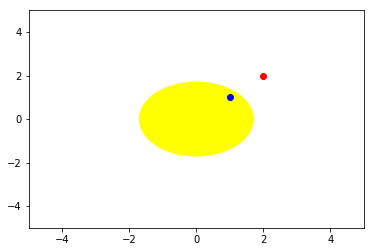

In [16]:
import matplotlib.pyplot as plt
circle1 = plt.Circle((0, 0), 1.7, color='yellow')
ax = plt.gca()
ax.cla() 
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
plt.plot([1], [1], 'bo')
plt.plot([2],[2], 'ro')
ax.add_artist(circle1)
plt.show()

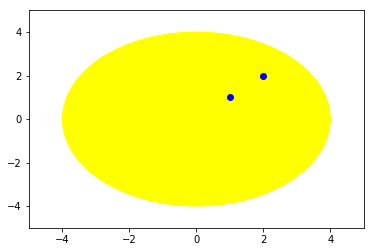

In [17]:
import matplotlib.pyplot as plt
circle1 = plt.Circle((0, 0), 4.0, color='yellow')
ax = plt.gca()
ax.cla() 
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
plt.plot([1,2], [1,2], 'bo')
#plt.plot([2],[2], 'ro')
ax.add_artist(circle1)
plt.show()

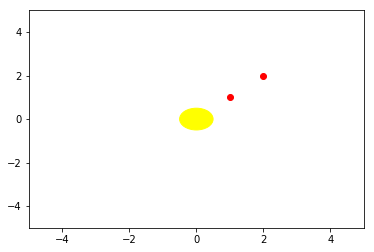

In [18]:
import matplotlib.pyplot as plt
circle1 = plt.Circle((0, 0), 0.5, color='yellow')
ax = plt.gca()
ax.cla() 
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
plt.plot([1,2], [1,2], 'ro')
#plt.plot([2],[2], 'ro')
ax.add_artist(circle1)
plt.show()

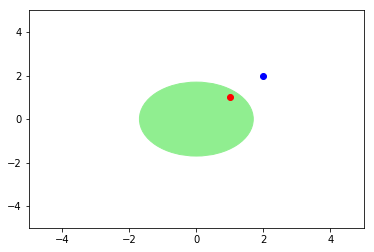

In [19]:
import matplotlib.pyplot as plt
circle1 = plt.Circle((0, 0), 1.7, color='lightgreen')
ax = plt.gca()
ax.cla() 
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
plt.plot([1], [1], 'ro')
plt.plot([2],[2], 'bo')
ax.add_artist(circle1)
plt.show()

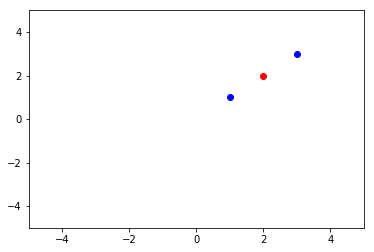

In [20]:
import matplotlib.pyplot as plt
circle1 = plt.Circle((0, 0), 1.7, color='yellow')
ax = plt.gca()
ax.cla() 
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
plt.plot([1,3], [1,3], 'bo')
plt.plot([2],[2], 'ro')
#ax.add_artist(circle1)
plt.show()

In the above figures, a **blue** point is a **positive** point, a **red** point is a **negative** point, a **yellow hypothesis circle** classifies points as positive if they lie on the boundary or interior of the circle, and negative otherwise, and a **green hypothesis circle** classifies points as positive if they lie on the boundary or exterior of the circle, and negative otherwise 

**Solution**: 

Suppose there are two points in the first quadrant at (1,1) - radii $r_1$ = 1, and at (2,2) - radii $r_2$ = 2 .
Let the point at $r_1$ be a blue (positive) point, and that at $r_2$ be a red (negative) point, then there are four possible configurations. 

First we consider the two points to be located at different distances from the origin.<br>
(1) When the point at (1,1) is positive and (2,2) is negative, a circle with radii $r_1 \leq r < r_2  $ would classify the points correctly if we consider it to be from the first type of hypothesis class.<br>
(2) When both the points are positive, a circle with radii $r \geq r_2$ would classify the points correctly if we consider it to be from the first type of hypothesis class.<br>
(3) When both the points are negative, a circle with radii $r \leq r_1$ would classify the points correctly if we consider it to be from the first type hypothesis class.<br>
(4) When the point at (1,1) is negative and (2,2) is positive, it is not possible to have a similar circle that classifies the point at (2,2) positive without also classifying the point at (1,1) positive (i.e any such circle will necessarily also classify the point at (1,1) positive and not negative, which is what we require.) However, a circle from the second type of hypothesis class with $r_1 \leq r < r_2$ would now classify these two points correctly. 

Hence the two types of circles in our hypothesis class are able to shatter all possible configurations of two points.
Thus the VC-dimension of our cirlces centered at the origin is now at least 2. Now we need to show at least one configuration for 3 points that these two types of circles are not able to shatter.

Let there be three points on a line in the first quadrant on a line passing throough the origin at (1,1), (2,2) and (3,3) for points 1,2 and 3 respectively. Let point 1 be positive, point 2 be negative, and point 3 be positive. Then none of the two types of hypothesis circles will be able to correctly classify all the 3 points correctly.

Since we have found at least one configuration for which 3 points cannot be correctly classified, the VC dimension in this case in not 3. Therefore the VC dimension is 2.

### [20 points] Problem 3: Empirical Verification of PAC Bounds for Axis-Aligned Rectangles 
***

In the in-class notebook associated with PAC Learnability, we proved a PAC bound for the class of concepts $C$ comprised of axis-aligned rectangles living in $\mathbb{R}^2$ of the form $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers. Specifically, we proved that with probability $1-\delta$, any consistent learner could learn a hypothesis $h$ in $H = C$ with generalization error less than $\epsilon$ provided that the number of training examples satisfied 

$$
m > \frac{4}{\epsilon}\log\frac{4}{\delta}
$$

In this problem you will empirically verify this bound for the restricted concept class $C$ where the rectangles are defined by $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers satisfying $0 \leq a \leq b \leq 100$ and $0 \leq c \leq d \leq 100$. 

**Part A**: The following is a general outline of how you should accomplish this, but it is up to you how you organize your code. 

- Write some code that randomly generates a concept rectangle $c$. 



- Write some code that, given feature vectors of length-2, labels them according to some rectangle (that is, labels a point positive if the point is on the boundary or interior of the rectangle, and negative otherwise).  



- Write some code that, given training examples of length-2, and labeled according to a concept $c$, returns a consistent hypothesis rectangle $h$. 



- Write some code that generates a training set of size $m$, labels them according to a random concept $c$, learns a consistent hypothesis $h$, and then approximates the generalization error by predicting on $1000$ new examples from the same distribution as the training data. 


- Write some code that computes approximate generalization errors for $100$ independent concepts $c$ and associated training sets of size $m$, and returns the worst-case generalization error at the confidence level $1-\delta$.  One way to do this in the case that say $\delta = 0.05$, is to report the $95^\textrm{th}$ percentile of the $100$ samples of the generalization error. We can then say that, in our simulation, $100(1-\delta)\%$ of our observed generalization errors were less than our computed value. (**Bonus**: If your code is efficient, try increasing the number of runs in the simulation to $500$. This should give you a better approximation of the generalization error.) 

The coordinates of the concept rectangle are: [ 11.45228491  34.86569311], [ 33.07068123  93.22341392]
The coordinates of the hypothesis rectangle are: [11.72619259923483, 34.102714236511112],[33.520626139219566, 86.510889215393334]
The generalization error is 0.027
The maximum generalization error is: 0.05
The 95th percentile of error is: 0.028


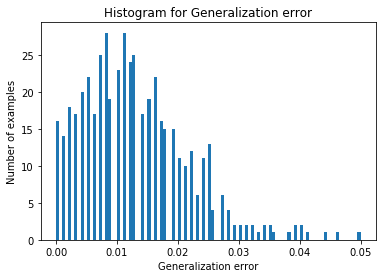

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Labelling a point according to a concept 
def labeller(point, xs, ys):
    if xs[0]<=point[0] and point[0]<=xs[1] and ys[0]<=point[1] and point[1]<=ys[1]:
        lb = 1
    else:
        lb = -1
    return lb

# Generating the hypothesis rectangle
def hyprect(xtr, ytr):
    index = np.where(ytr>0)
    k = len(index[0])
    if (k==0):
        x = [0, 0]
        y = [0, 0]
    else:
        x1 = np.min(xtr[index,0])
        x2 = np.max(xtr[index,0])
        y1 = np.min(xtr[index,1])
        y2 = np.max(xtr[index,1])
        x = [x1, x2]
        y = [y1, y2]
    return x, y

# Calculating the generalization error
def error(prediction, testset):
    j = 0
    for k in range(len(prediction)):
        if prediction[k]!=testset[k]:
            j+=1
    return j/len(prediction)

# Given a training set of m points and a concept, generate the hypothesis
def hyptrain(m, conx, cony):
    xtrain = np.reshape(np.random.uniform(low=0, high=100, size=2*m), (m,2)) 
    ytrain = np.empty((m))
    for i in range(m):
        ytrain[i] = labeller(xtrain[i], conx, cony)
    return hyprect(xtrain, ytrain)

# Using the test set to compute the generalization error
def testerror(n, conx, cony, hypx, hypy):
    xtest = np.reshape(np.random.uniform(low=0, high=100, size=2*n), (n,2)) 
    pred = np.empty((n))
    ytest = np.empty((n))
    for i in range(n):
        ytest[i] = labeller(xtest[i], conx, cony)
    for i in range(n):
        pred[i] = labeller(xtest[i], hypx, hypy)
    ab = error(pred, ytest)
    return ab

# Computing the approximate generalization errors for 500 independent concepts c and associated training sets of size m , 
# and returning the worst-case generalization error
def batch(m, d, itr=500):
    ntest = 1000
    generror = np.empty((itr))
    for i in range(itr):
        rd = np.random.uniform(low=0, high=100, size=4)
        conx = np.sort(rd[:2])
        cony = np.sort(rd[2:])
        hypx, hypy = hyptrain(m, conx, cony)
        generror[i] = testerror(ntest, conx, cony, hypx, hypy)
    print("The maximum generalization error is: {}".format(np.max(generror)))
    print("The {}th percentile of error is: {}".format(int(100*(1-d)), np.percentile(generror, 100*(1-d))))
    return generror, np.max(generror), np.percentile(generror, 100*(1-d))

def part_A():
    rnd = np.random.uniform(low=0, high=100, size=4)
    conx = np.sort(rnd[:2])
    cony = np.sort(rnd[2:])
    hypx, hypy = hyptrain(250, conx, cony)
    generror = testerror(1000, conx, cony, hypx, hypy)
    print('The coordinates of the concept rectangle are: {}, {}'.format(conx, cony))
    print('The coordinates of the hypothesis rectangle are: {},{}'.format(hypx, hypy))
    print('The generalization error is {}'.format(generror))
    generror,maxerror,percerror = batch(m=250, d = 0.05, itr = 500)
    plt.hist(generror, bins=100)
    plt.title("Histogram for Generalization error")
    plt.xlabel('Generalization error')
    plt.ylabel('Number of examples')
    plt.show()
    
part_A()

**Part B**: Use your code to estimate the generalization error with confidence parameter $\delta=0.05$ for training sets of size $m$ where $m = 250, 500, 1000, 1250,$ and $1500$ and the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the continuous uniform distribution $\textrm{unif}(0,100)$. Make a **log-log** plot with $m$ on the horizontal axes and $\epsilon$ on the vertical axis.  Additionally, overlay the theoretical PAC bound on your graph and discuss your results. 

For m = 250
The maximum generalization error is: 0.041
The 95th percentile of error is: 0.028
For m = 500
The maximum generalization error is: 0.026
The 95th percentile of error is: 0.015
For m = 1000
The maximum generalization error is: 0.013
The 95th percentile of error is: 0.008
For m = 1250
The maximum generalization error is: 0.014
The 95th percentile of error is: 0.008
For m = 1500
The maximum generalization error is: 0.01
The 95th percentile of error is: 0.007


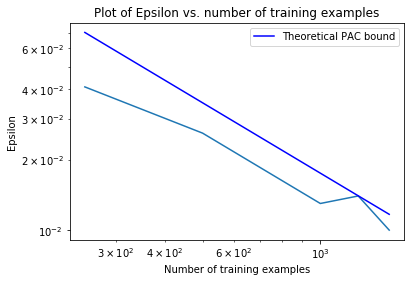

In [41]:
def part_B():
    d = 0.05
    mvals = np.array([250, 500, 1000, 1250, 1500])
    maxerrors = np.empty((len(mvals)))
    generrors = np.empty((len(mvals)))
    percerrors = np.empty((len(mvals)))
    for i,m in enumerate(mvals):
        print ("For m =", m)
        _, maxerrors[i],_ = batch(m, d, itr=500)
    epsilon = (4.0/mvals)*np.log(4.0/d)
    plt.loglog(mvals, maxerrors)
    plt.loglog(mvals, epsilon, label='Theoretical PAC bound', color = 'blue')
    plt.title('Plot of Epsilon vs. number of training examples')
    plt.xlabel('Number of training examples')
    plt.ylabel('Epsilon')
    plt.legend(loc=0)
    plt.show()

part_B()

**Discussions for Part B**: As shown above, the error goes down as we increase the number of training examples. This demonstrates the concept of PAC learnability. Also, the empirical error (almost) always stays below the theoretical PAC bound. 

**Part C**: Repeat **Part B** where the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the normal distribution with mean $\mu = 50$ and standard deviation $\sigma = 25$. Again, overlay the theoretical PAC bound on your graph and discuss your results. Do you expect to observe very different results than those observed in **Part B**?  

For m = 250
The maximum generalization error is: 0.062
The 95th percentile of error is: 0.029
For m = 500
The maximum generalization error is: 0.023
The 95th percentile of error is: 0.016
For m = 1000
The maximum generalization error is: 0.016
The 95th percentile of error is: 0.008049999999999955
For m = 1250
The maximum generalization error is: 0.014
The 95th percentile of error is: 0.008
For m = 1500
The maximum generalization error is: 0.012
The 95th percentile of error is: 0.006


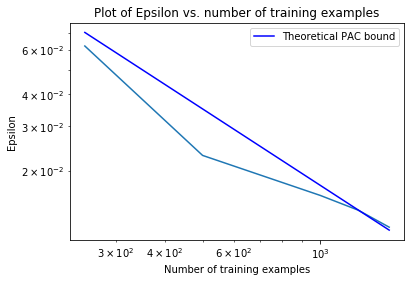

In [43]:
# Given a training set of m points from a normal distribution with mean = 50 and standard deviaton = 25 and a concept, 
# generate the hypothesis
def hyptrainnormal(m, conx, cony):
    xtrain = np.reshape(np.random.normal(loc = 50, scale = 25, size=2*m), (m,2)) 
    ytrain = np.empty((m))
    for i in range(m):
        ytrain[i] = labeller(xtrain[i], conx, cony)
    return hyprect(xtrain, ytrain)

# Using the test set (generated from a normal distribution with mean = 50 and standard deviaton = 25) 
# to compute the generalization error
def testerrornormal(n, conx, cony, hypx, hypy):
    xtest = np.reshape(np.random.normal(loc = 50, scale = 25, size=2*n), (n,2)) 
    pred = np.empty((n))
    ytest = np.empty((n))
    for i in range(n):
        ytest[i] = labeller(xtest[i], conx, cony)
    for i in range(n):
        pred[i] = labeller(xtest[i], hypx, hypy)
    ab = error(pred, ytest)
    return ab

# Computing the approximate generalization errors for 500 independent concepts c and associated training sets of size m , 
# and returning the worst-case generalization error
def batchnormal(m, d, itr=500):
    ntest = 1000
    generror = np.empty((itr))
    for i in range(itr):
        rd = np.random.normal(loc=50, scale = 25, size=4)
        conx = np.sort(rd[:2])
        cony = np.sort(rd[2:])
        hypx, hypy = hyptrainnormal(m, conx, cony)
        generror[i] = testerrornormal(ntest, conx, cony, hypx, hypy)
    print("The maximum generalization error is: {}".format(np.max(generror)))
    print("The {}th percentile of error is: {}".format(int(100*(1-d)), np.percentile(generror, 100*(1-d))))
    return generror, np.max(generror), np.percentile(generror, 100*(1-d))

def part_C():
    d = 0.05
    mvals = np.array([250, 500, 1000, 1250, 1500])
    maxerrors = np.empty((len(mvals)))
    generrors = np.empty((len(mvals)))
    percerrors = np.empty((len(mvals)))
    for i,m in enumerate(mvals):
        print ("For m =", m)
        _, maxerrors[i],_ = batchnormal(m, d, itr=500)
    epsilon = (4.0/mvals)*np.log(4.0/d)
    plt.loglog(mvals, maxerrors)
    plt.loglog(mvals, epsilon, label='Theoretical PAC bound', color = 'blue')
    plt.title('Plot of Epsilon vs. number of training examples')
    plt.xlabel('Number of training examples')
    plt.ylabel('Epsilon')
    plt.legend(loc=0)
    plt.show()

part_C()

**Discussions for Part C**: As shown above, the behaviour of $\epsilon$ is similar to that for Part B (i.e. with points sampled from a uniform distribution). In other words, there is no change when we change the distribution to a normal distribution from an unifrom one, and the prediction stays mostly below the theoretical prediction - this happnes because we sample the concept rectangle, the training set and the test set from the normal distribution instead of the uniform distribution (from which they were sampled for Part B). <br>
It was observed that this changes when we sample the training set from the normal distribution, and the concept rectangle and the test set from the uniform distribution - in this case the predicted error overshoots the theoretical prediction.